In [12]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
from torch import nn
from sklearn.datasets import load_iris
from torch.utils.data import Dataset,DataLoader
from sklearn import preprocessing
from torch.autograd import Variable

In [13]:
iris = load_iris()
X = iris.data
y = torch.from_numpy(iris.target)

In [14]:
# normalize


In [15]:
class dataset(Dataset):
    def __init__(self,X,y):
        scaler = preprocessing.StandardScaler().fit(X)
        self.X = torch.from_numpy(scaler.transform(X)).float()
        self.y = y
    def __len__(self):
        return len(self.y)
    
    
    def __getitem__(self,idx):
        
        return self.X[idx],self.y[idx]
        

In [22]:
class _BatchNorm(nn.Module):
    def __init__(self,input_shape):
        super(_BatchNorm,self).__init__()
        
        self.eps = 0.001
                
        self.gamma = Variable(torch.ones(5,3))
        self.mu = Variable(torch.ones(5,3))
        
        
    def forward(self,x):
        sigma,mu = torch.var_mean(x)
        
        norm_x = (x - mu)/torch.sqrt(sigma + self.eps)        
        
        norm_output = (self.gamma * norm_x) + self.mu
        
        return norm_output

In [23]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.l1 = nn.Linear(4,3)
        self.l2 = nn.Linear(3,3)
        self.soft = nn.Softmax()
        self.batch = _BatchNorm(2)
        
    def forward(self,x):
        output = self.l1(x)
           
        output = self.batch(output)
       
        output = self.l2(output)
        
        return self.soft(output)
    
        

In [24]:
network = Network()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(),0.01)

In [25]:
dset = dataset(X,y)
load = DataLoader(dset,batch_size=5)
#load = iter(load)

In [26]:
# trining
loss_ = []
for i in range(10):
    for m,(X,y) in enumerate(load):
        
        output = network(X)
    
        
        loss = criterion(output,y)

        print(loss)
        loss_.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    

tensor(0.9982, grad_fn=<NllLossBackward>)
tensor(0.9756, grad_fn=<NllLossBackward>)
tensor(0.9534, grad_fn=<NllLossBackward>)
tensor(0.9314, grad_fn=<NllLossBackward>)
tensor(0.9095, grad_fn=<NllLossBackward>)
tensor(0.8876, grad_fn=<NllLossBackward>)
tensor(0.8660, grad_fn=<NllLossBackward>)
tensor(0.8449, grad_fn=<NllLossBackward>)
tensor(0.8245, grad_fn=<NllLossBackward>)
tensor(0.8049, grad_fn=<NllLossBackward>)


<ipython-input-23-83fe6248fcae>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.soft(output)


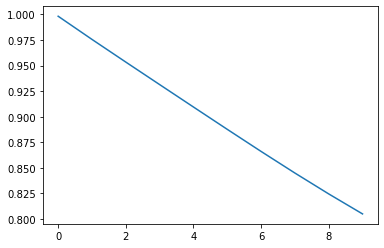

In [27]:
plt.plot(loss_)